CSC 529 Final Project

Name: Kai Chung Ying, Tyler Jewell

Due Date: 03-20-2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

##Read Dataset

In [2]:
#Read the dataset
df = pd.read_csv("./train2.csv")
df = df.set_index("id")
print("The dimenision of the original dataset is ",df.shape)
df.head(5)

The dimenision of the original dataset is  (595212, 58)


,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


##Data Cleaning

In [3]:
df2=df
df2.loc[:,"ps_ind_02_cat"][df2.loc[:,"ps_ind_02_cat"] == -1] = pd.DataFrame(df2.ps_ind_02_cat[df2.ps_ind_02_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_ind_04_cat"][df2.loc[:,"ps_ind_04_cat"] == -1] = pd.DataFrame(df2.ps_ind_02_cat[df2.ps_ind_02_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_ind_05_cat"][df2.loc[:,"ps_ind_05_cat"] == -1] = pd.DataFrame(df2.ps_ind_05_cat[df2.ps_ind_05_cat != -1].value_counts()).reset_index().loc[0,"index"]

df2.loc[:,"ps_reg_03"][df2.loc[:,"ps_reg_03"]==-1] = df2.loc[:,"ps_reg_03"][df2.loc[:,"ps_reg_03"] != -1].mean()
df2.loc[:,"ps_car_01_cat"][df2.loc[:,"ps_car_01_cat"] == -1] = pd.DataFrame(df2.ps_car_01_cat[df2.ps_car_01_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_car_02_cat"][df2.loc[:,"ps_car_02_cat"] == -1] = pd.DataFrame(df2.ps_car_02_cat[df2.ps_car_02_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_car_03_cat"][df2.loc[:,"ps_car_03_cat"] == -1] = pd.DataFrame(df2.ps_car_03_cat[df2.ps_car_03_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_car_05_cat"][df2.loc[:,"ps_car_05_cat"] == -1] = pd.DataFrame(df2.ps_car_05_cat[df2.ps_car_05_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_car_07_cat"][df2.loc[:,"ps_car_07_cat"] == -1] = pd.DataFrame(df2.ps_car_07_cat[df2.ps_car_07_cat != -1].value_counts()).reset_index().loc[0,"index"]
df2.loc[:,"ps_car_09_cat"][df2.loc[:,"ps_car_09_cat"] == -1] = pd.DataFrame(df2.ps_car_09_cat[df2.ps_car_09_cat != -1].value_counts()).reset_index().loc[0,"index"]

df2.loc[:,"ps_car_11"][df2.loc[:,"ps_car_11"] == -1] = df2.loc[:,"ps_car_11"][df2.loc[:,"ps_car_11"] != -1].mean()
df2.loc[:,"ps_car_12"][df2.loc[:,"ps_car_12"] == -1] = df2.loc[:,"ps_car_12"][df2.loc[:,"ps_car_12"] != -1].mean()
df2.loc[:,"ps_car_14"][df2.loc[:,"ps_car_14"] == -1] = df2.loc[:,"ps_car_14"][df2.loc[:,"ps_car_14"] != -1].mean()

Y= df2.loc[:,"target"]
X= df2.loc[:, "ps_ind_01":]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) #Normalize the X train variables in range (0,1)
X_norm = min_max_scaler.fit_transform(X)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

##Check the number of missing value on every attributes

In [4]:
col_index_lst=list(df2.columns)
for col_name in col_index_lst:
    print("%s %s"% (col_name,df2[df.loc[:,col_name]==-1].shape))

target (0, 58)
ps_ind_01 (0, 58)
ps_ind_02_cat (0, 58)
ps_ind_03 (0, 58)
ps_ind_04_cat (0, 58)
ps_ind_05_cat (0, 58)
ps_ind_06_bin (0, 58)
ps_ind_07_bin (0, 58)
ps_ind_08_bin (0, 58)
ps_ind_09_bin (0, 58)
ps_ind_10_bin (0, 58)
ps_ind_11_bin (0, 58)
ps_ind_12_bin (0, 58)
ps_ind_13_bin (0, 58)
ps_ind_14 (0, 58)
ps_ind_15 (0, 58)
ps_ind_16_bin (0, 58)
ps_ind_17_bin (0, 58)
ps_ind_18_bin (0, 58)
ps_reg_01 (0, 58)
ps_reg_02 (0, 58)
ps_reg_03 (0, 58)
ps_car_01_cat (0, 58)
ps_car_02_cat (0, 58)
ps_car_03_cat (0, 58)
ps_car_04_cat (0, 58)
ps_car_05_cat (0, 58)
ps_car_06_cat (0, 58)
ps_car_07_cat (0, 58)
ps_car_08_cat (0, 58)
ps_car_09_cat (0, 58)
ps_car_10_cat (0, 58)
ps_car_11_cat (0, 58)
ps_car_11 (0, 58)
ps_car_12 (0, 58)
ps_car_13 (0, 58)
ps_car_14 (0, 58)
ps_car_15 (0, 58)
ps_calc_01 (0, 58)
ps_calc_02 (0, 58)
ps_calc_03 (0, 58)
ps_calc_04 (0, 58)
ps_calc_05 (0, 58)
ps_calc_06 (0, 58)
ps_calc_07 (0, 58)
ps_calc_08 (0, 58)
ps_calc_09 (0, 58)
ps_calc_10 (0, 58)
ps_calc_11 (0, 58)
ps_calc_12

##Check the correlation between attributes

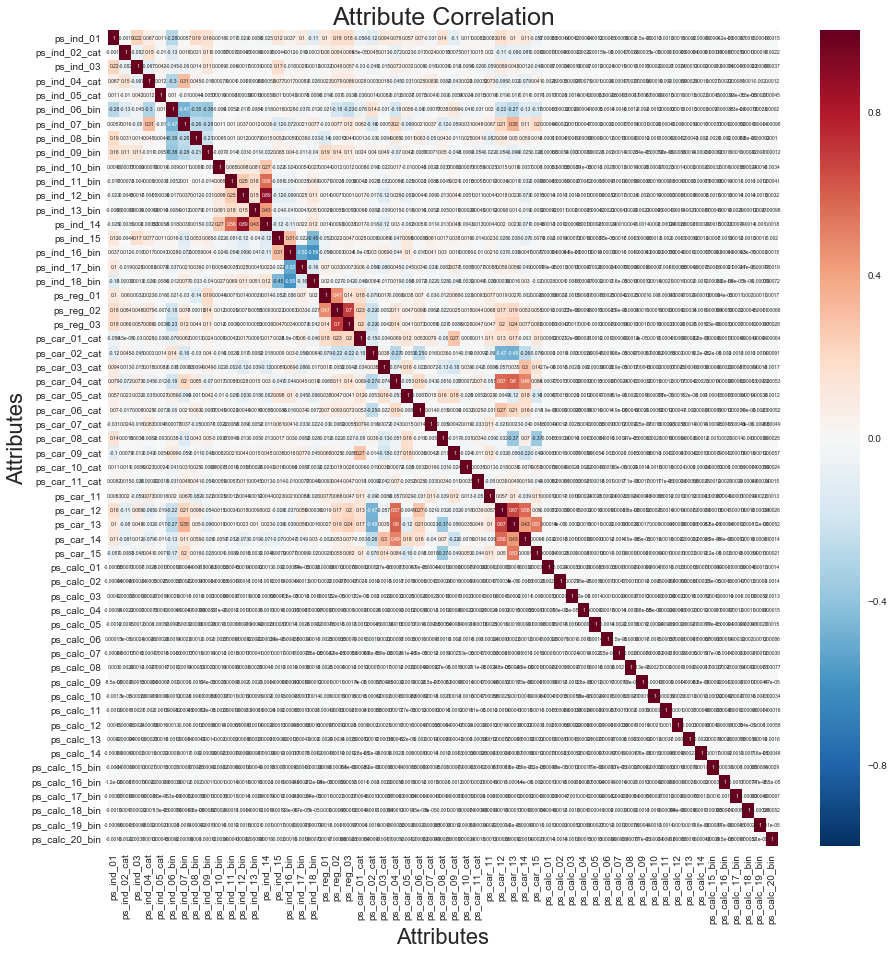

In [707]:
import seaborn as sns

X_corr_df= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(X_corr_df, annot=True, annot_kws={"size": 5})
plt.title("Attribute Correlation", size=25)
plt.xlabel("Attributes", size=22)
plt.ylabel("Attributes", size=22)
plt.show()



##Check the distribution of Target Class Labels

0    573518
1     21694
Name: target, dtype: int64


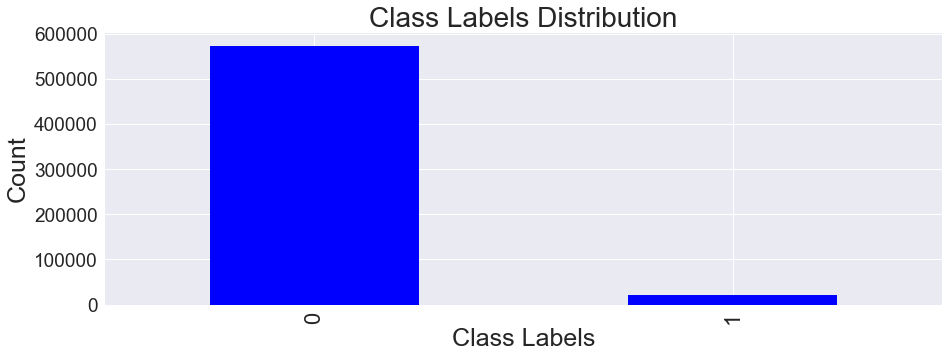

In [675]:
#Visualize the proportion of the target variables
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1,1,1)
print(df2["target"].value_counts())
df["target"].value_counts().plot(kind='bar', color='blue')
plt.xlabel("Class Labels", size=25)
plt.ylabel("Count",size=25)
plt.title("Class Labels Distribution", size=28)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=19)
fig.savefig('Class_distribution_plot1.png')
plt.show()

As we can observe the above, the proportion of class labels (0 & 1) are very imbalanced. SMOTE technique might be one of our approach to achieve a better result. The SMOTE process includes Over-Sampling the Minority Class and Under-Sampling the Majority Class. 

##Check the exact counts of each attributes

In [710]:
for name in X.columns:
    print(name)
    print(X.loc[:,name].value_counts())

ps_ind_01
0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: ps_ind_01, dtype: int64
ps_ind_02_cat
1    432075
2    123573
3     28186
4     11378
Name: ps_ind_02_cat, dtype: int64
ps_ind_03
2     96110
3     81973
1     67994
4     67213
5     62803
6     60406
7     52364
8     39667
9     25436
0     15514
10    14484
11    11248
Name: ps_ind_03, dtype: int64
ps_ind_04_cat
0    346965
1    248247
Name: ps_ind_04_cat, dtype: int64
ps_ind_05_cat
0    533818
6     20662
4     18344
1      8322
3      8233
2      4184
5      1649
Name: ps_ind_05_cat, dtype: int64
ps_ind_06_bin
0    360852
1    234360
Name: ps_ind_06_bin, dtype: int64
ps_ind_07_bin
0    442223
1    152989
Name: ps_ind_07_bin, dtype: int64
ps_ind_08_bin
0    497644
1     97568
Name: ps_ind_08_bin, dtype: int64
ps_ind_09_bin
0    484917
1    110295
Name: ps_ind_09_bin, dtype: int64
ps_ind_10_bin
0    594990
1       222
Name: ps_ind_10_bin, dtype: int64
ps_ind_11_bin
0    5

0.5    60070
0.4    59823
0.0    59618
0.3    59593
0.7    59502
0.6    59501
0.2    59385
0.1    59383
0.9    59219
0.8    59118
Name: ps_calc_02, dtype: int64
ps_calc_03
0.1    60036
0.5    59832
0.3    59819
0.6    59521
0.8    59509
0.9    59418
0.7    59393
0.0    59318
0.4    59229
0.2    59137
Name: ps_calc_03, dtype: int64
ps_calc_04
2    193977
3    175512
1    108012
4     79606
0     23912
5     14193
Name: ps_calc_04, dtype: int64
ps_calc_05
2    195160
1    170860
3    119192
0     61226
4     40682
5      7534
6       558
Name: ps_calc_05, dtype: int64
ps_calc_06
8     175015
7     139771
9     129207
6      73478
10     43085
5      26613
4       6705
3       1199
2        132
1          6
0          1
Name: ps_calc_06, dtype: int64
ps_calc_07
3    162414
2    139101
4    122039
1     69309
5     61705
6     20403
0     15290
7      4381
8       547
9        23
Name: ps_calc_07, dtype: int64
ps_calc_08
9     151746
10    151330
8     102944
11     91639
7      49567
12  

##Visualize distribution of binary variables against Target variable

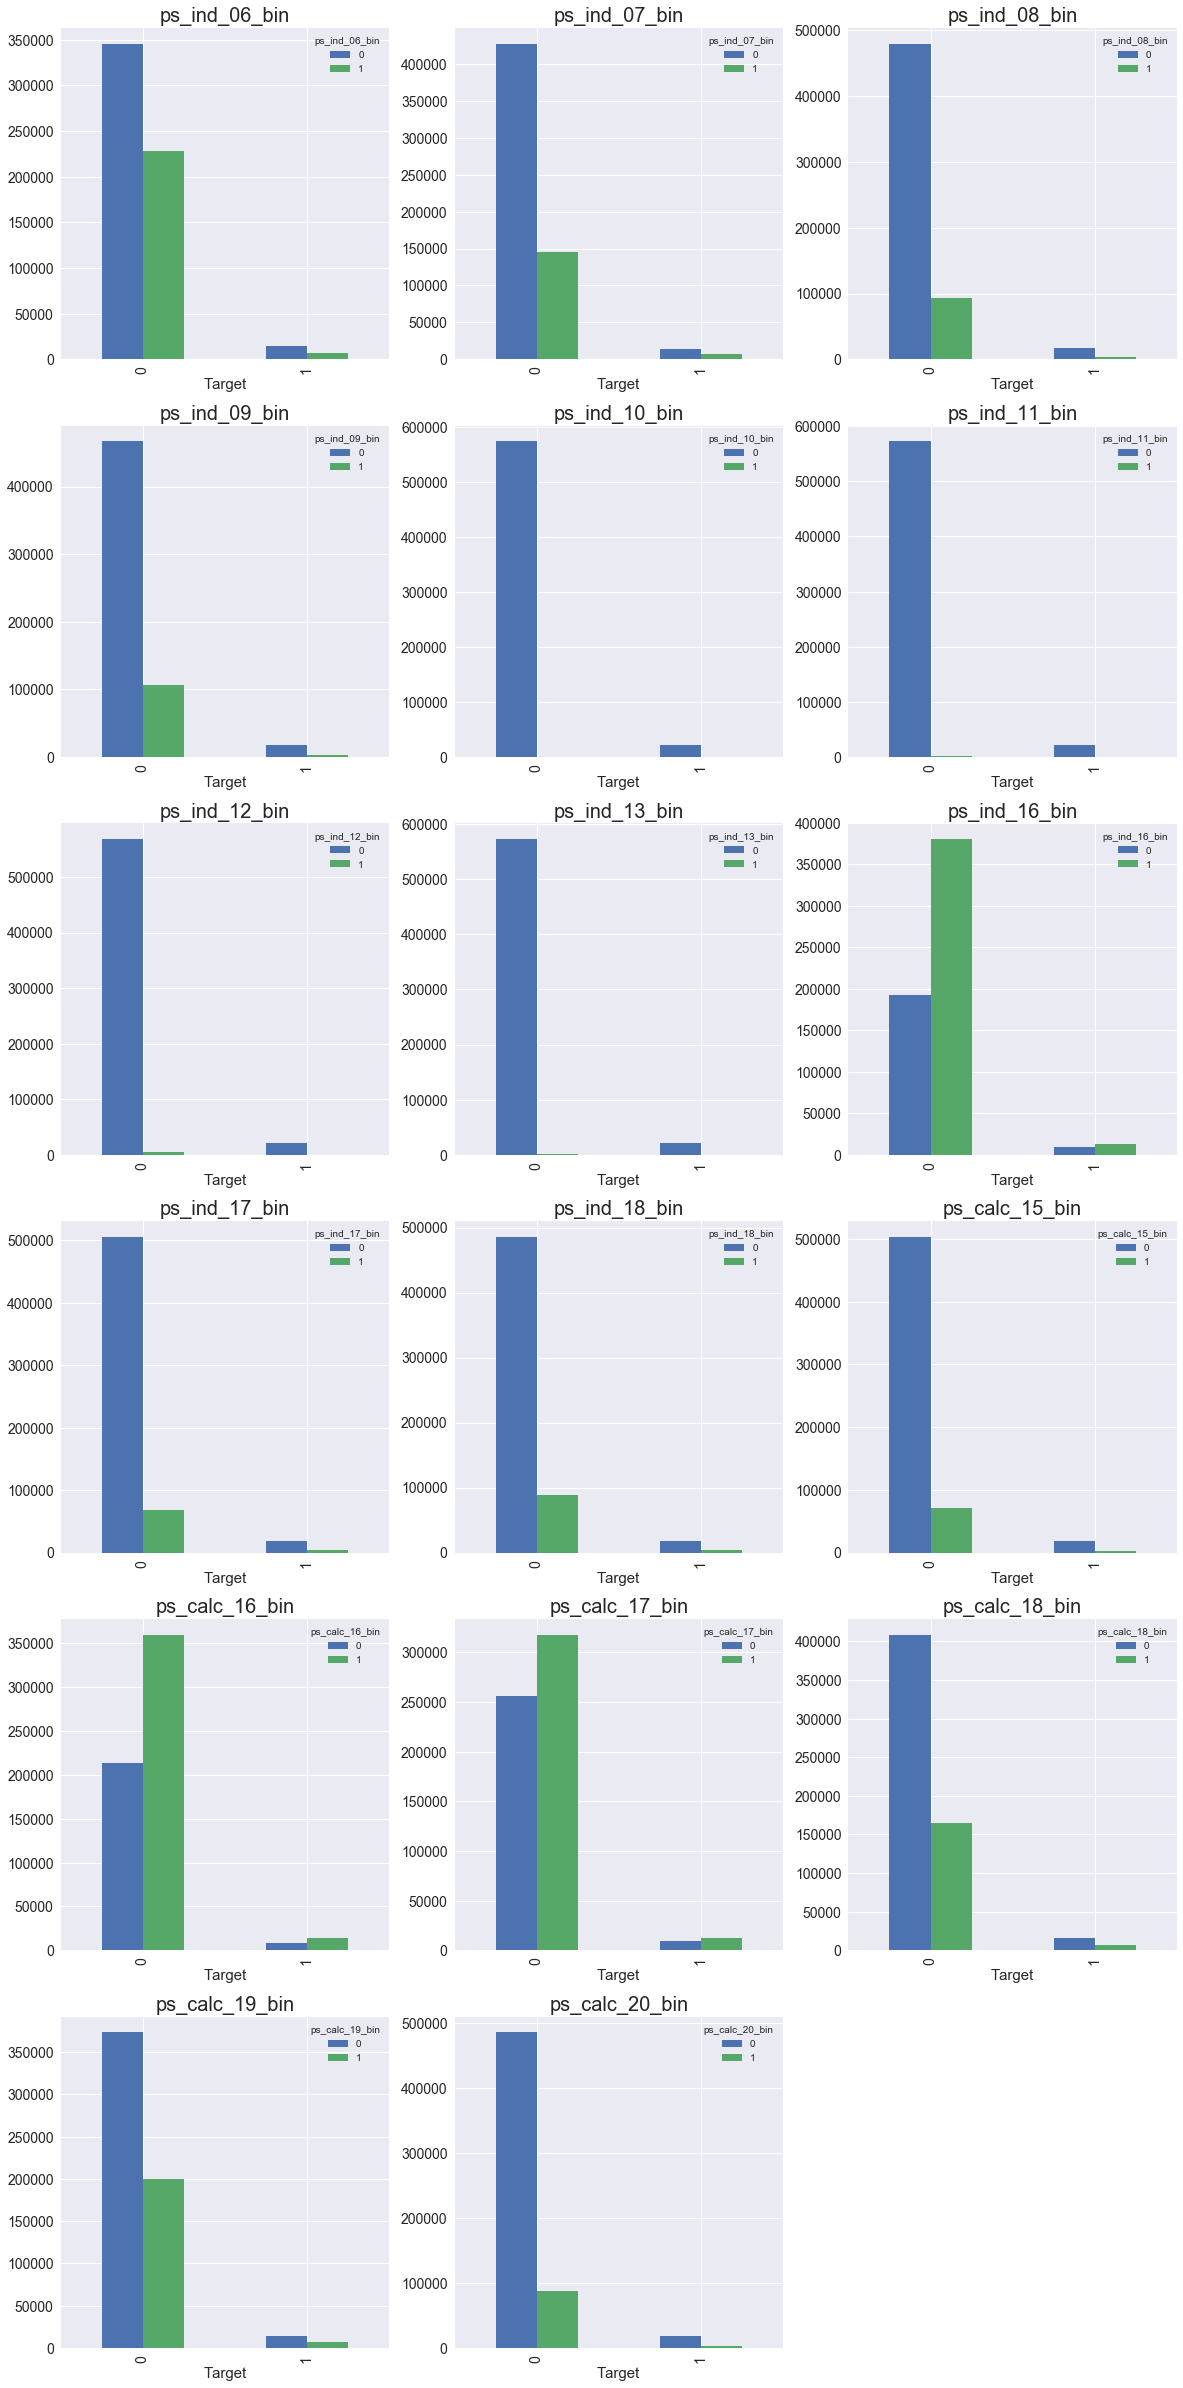

In [711]:
cols = ["ps_ind_06_bin","ps_ind_07_bin","ps_ind_08_bin","ps_ind_09_bin","ps_ind_10_bin","ps_ind_11_bin",
        "ps_ind_12_bin","ps_ind_13_bin","ps_ind_16_bin","ps_ind_17_bin","ps_ind_18_bin", "ps_calc_15_bin",
        "ps_calc_16_bin","ps_calc_17_bin","ps_calc_18_bin","ps_calc_19_bin","ps_calc_20_bin"]


#Using matplotlib module for graph plotting
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 50))
# Create an Axes object.


for i, name in enumerate (cols):
    ax1 = fig.add_subplot(7,3,i+1) # one row, two column, first plot
# Plot the data.
    pd.crosstab(df2['target'],df2[name]).plot.bar(ax=ax1)
    ax1.set_title("%s"%name, size=20)
    ax1.set_xlabel("Target", size=15)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    fig.savefig('binary_plot_1.png')
plt.show()
plt.close()

##Visualize the ordinal variables against Target variable

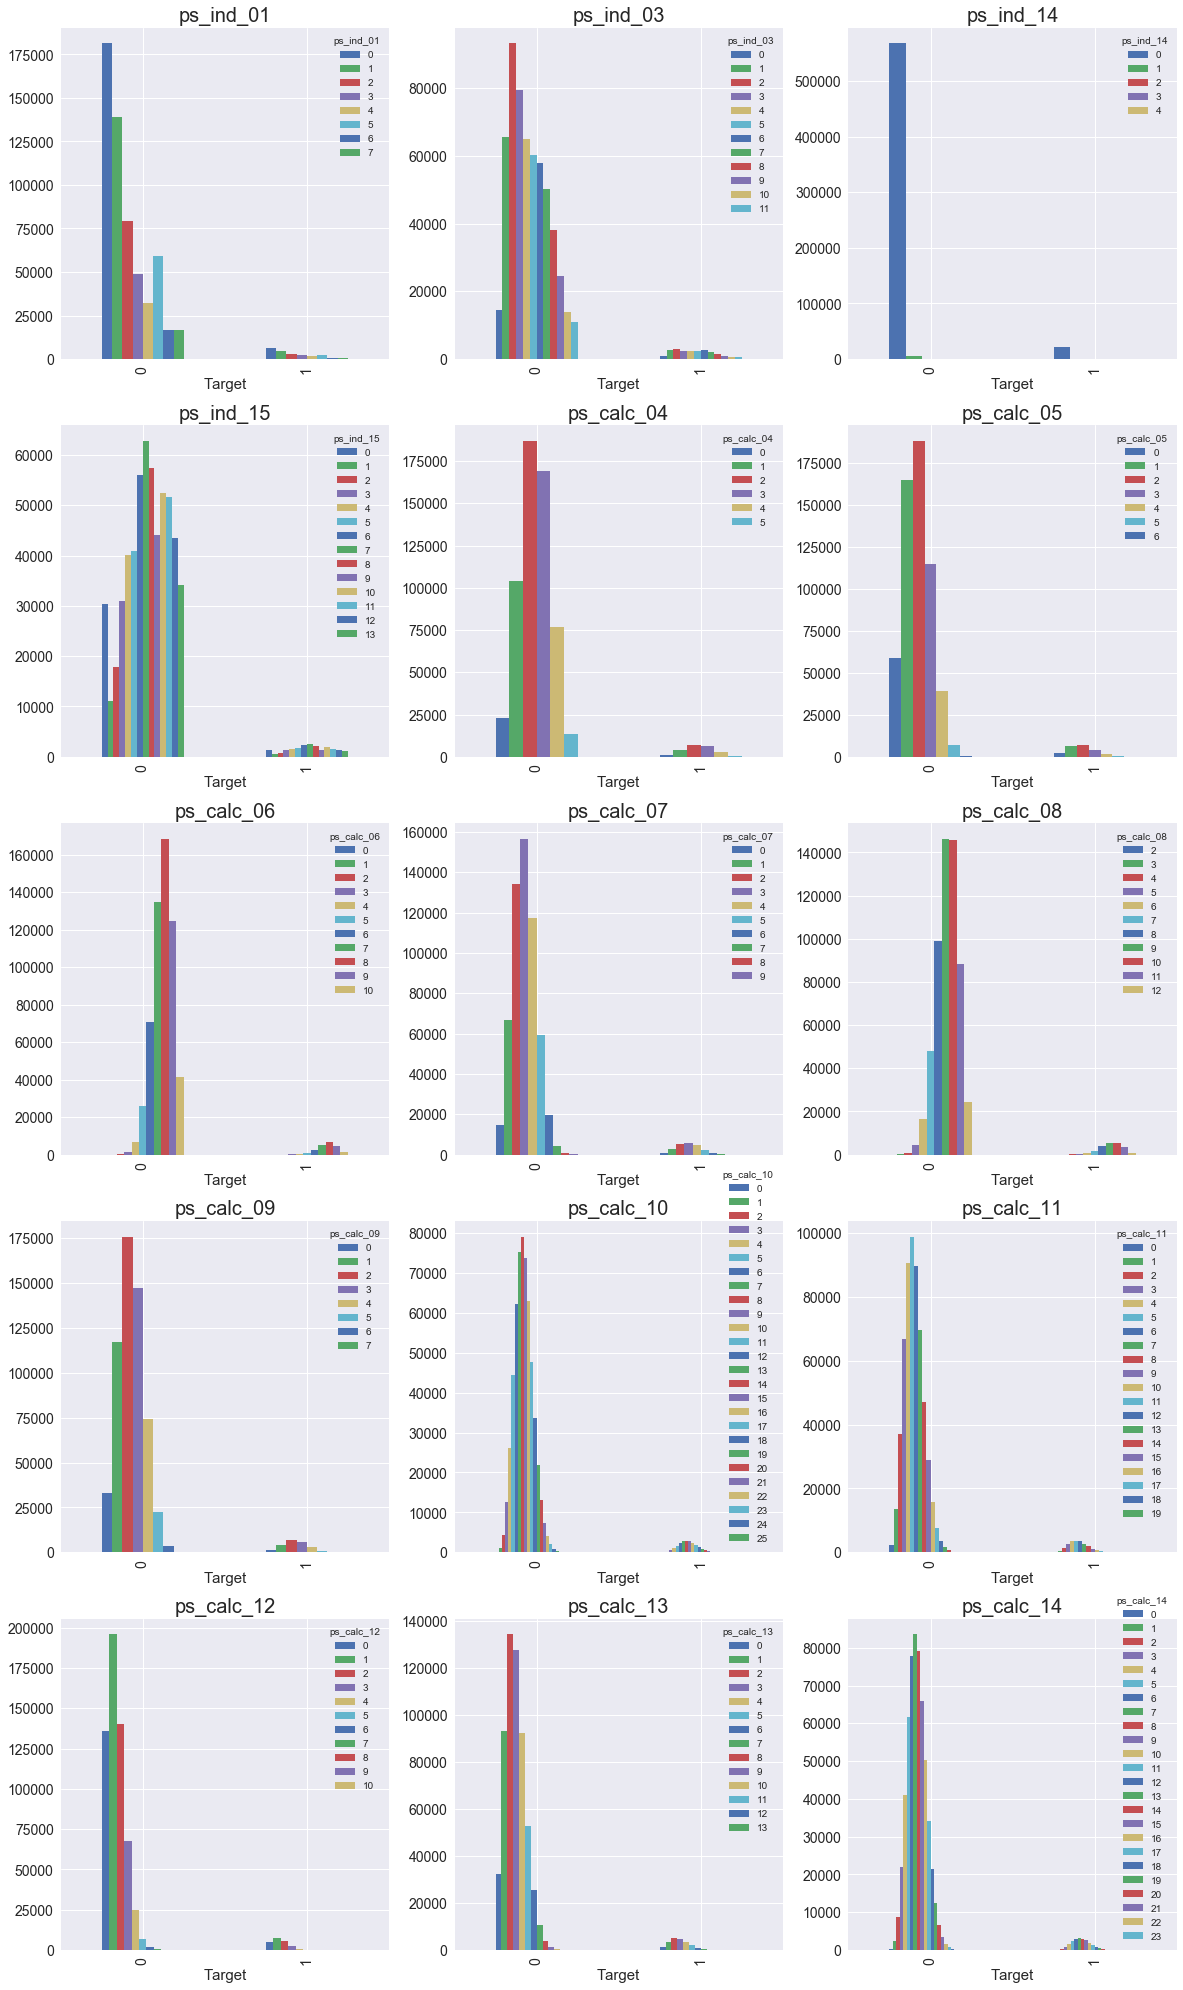

In [712]:
cols = ["ps_ind_01","ps_ind_03","ps_ind_14","ps_ind_15","ps_calc_04","ps_calc_05","ps_calc_06",
        "ps_calc_07","ps_calc_08","ps_calc_09","ps_calc_10","ps_calc_11","ps_calc_12","ps_calc_13","ps_calc_14"]


#Using matplotlib module for graph plotting
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 50))
# Create an Axes object.


for i, name in enumerate (cols):
    ax1 = fig.add_subplot(7,3,i+1) # one row, two column, first plot
# Plot the data.
    pd.crosstab(df2['target'],df2[name]).plot.bar(ax=ax1)
    ax1.set_title("%s"%name, size=20)
    ax1.set_xlabel("Target", size=15)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    fig.savefig('ordinal_plot_1.png')
plt.show()
plt.close()

##Visualize the Categorical variables against Target variables

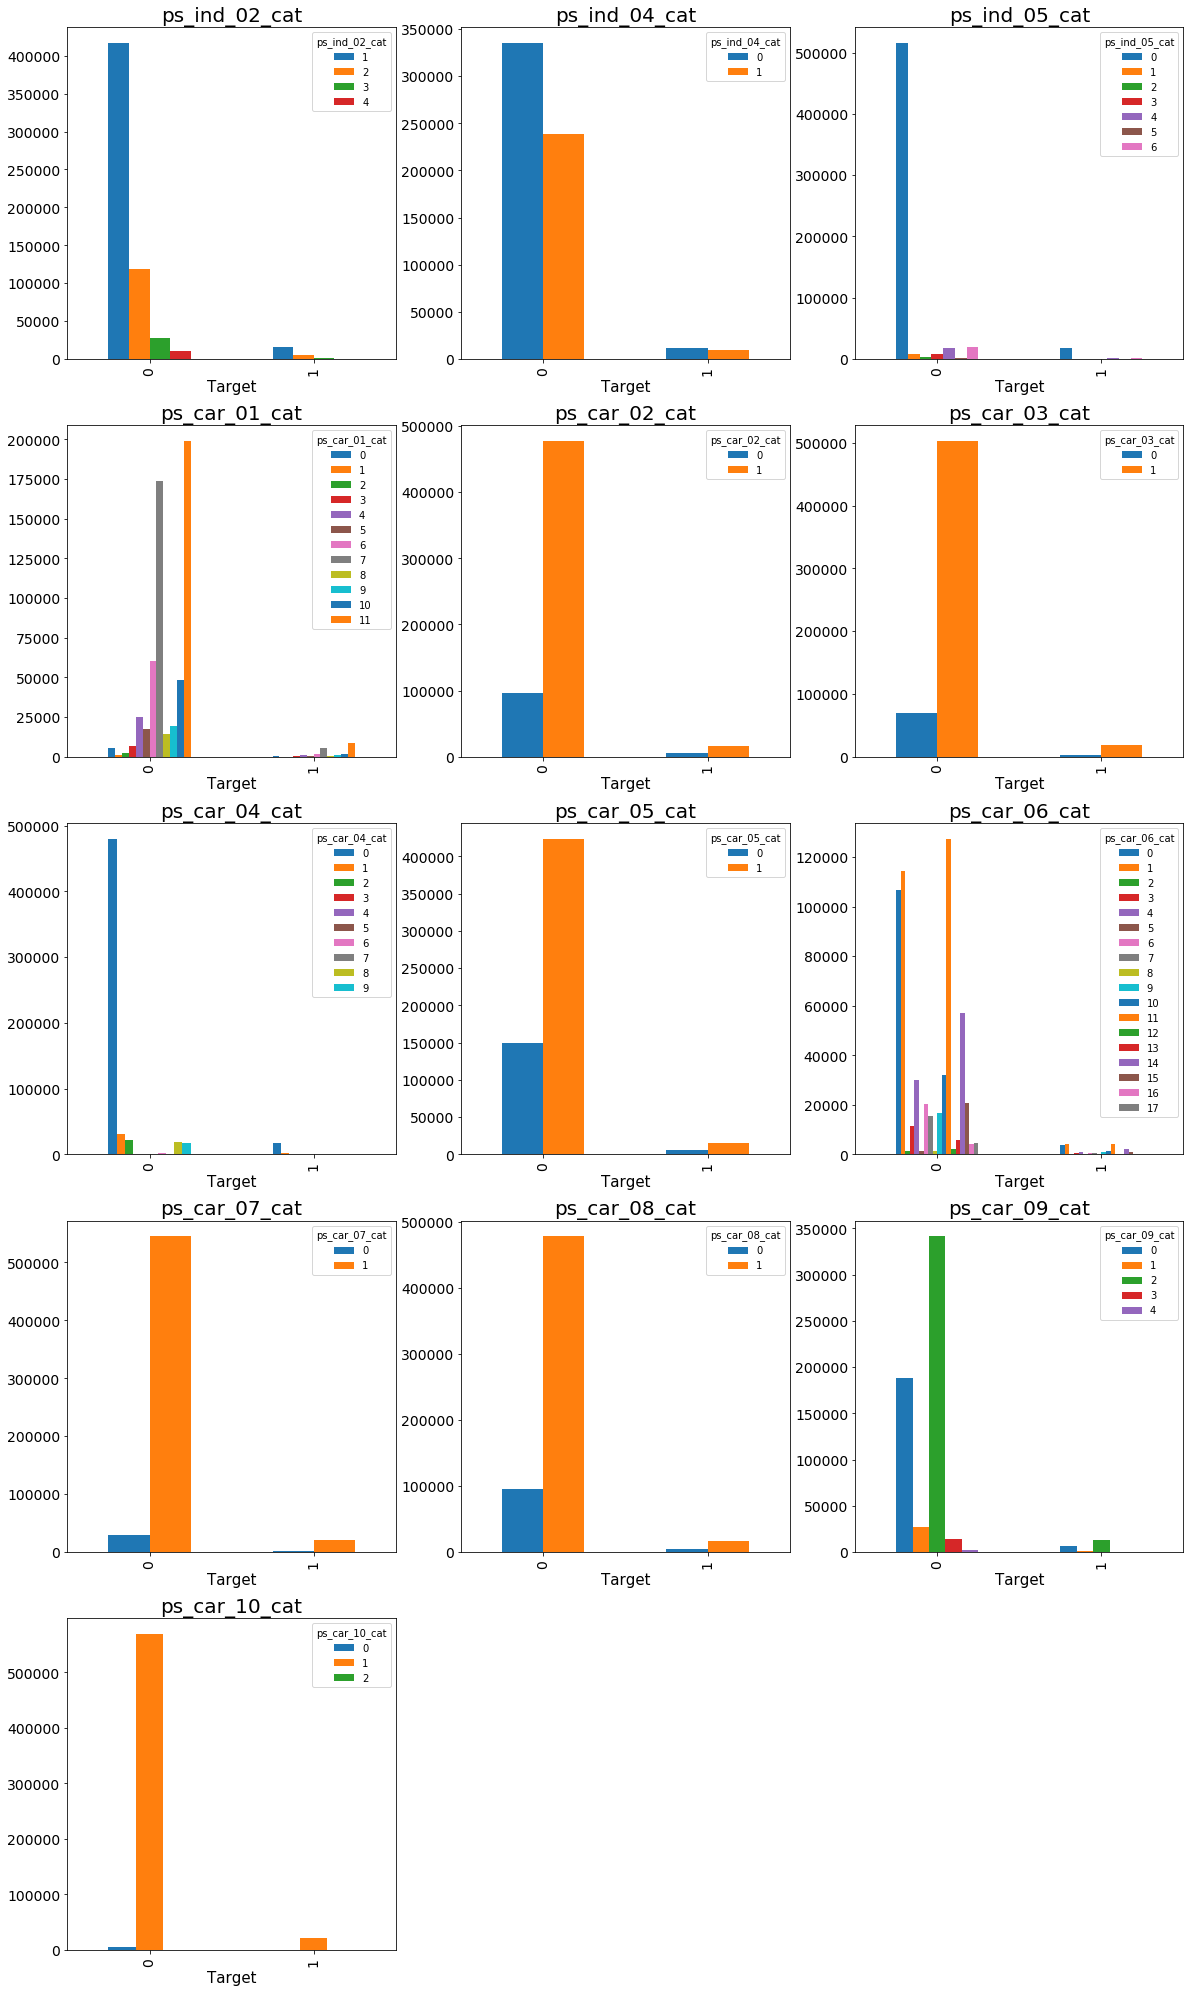

In [6]:
cols = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat',
        'ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat',
        'ps_car_08_cat','ps_car_09_cat','ps_car_10_cat']

#Using matplotlib module for graph plotting
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 50))
# Create an Axes object.


for i, name in enumerate (cols):
    ax1 = fig.add_subplot(7,3,i+1) # one row, two column, first plot
# Plot the data.
    pd.crosstab(df2['target'],df2[name]).plot.bar(ax=ax1)
    ax1.set_title("%s"%name, size=20)
    ax1.set_xlabel("Target", size=15)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    fig.savefig('Categorical_plot_1.png')
plt.show()
plt.close()



The orginal number of instance is 595212
The duplicated number of instance is 0
The is 0 missing values

0    573518
1     21694
Name: target, dtype: int64



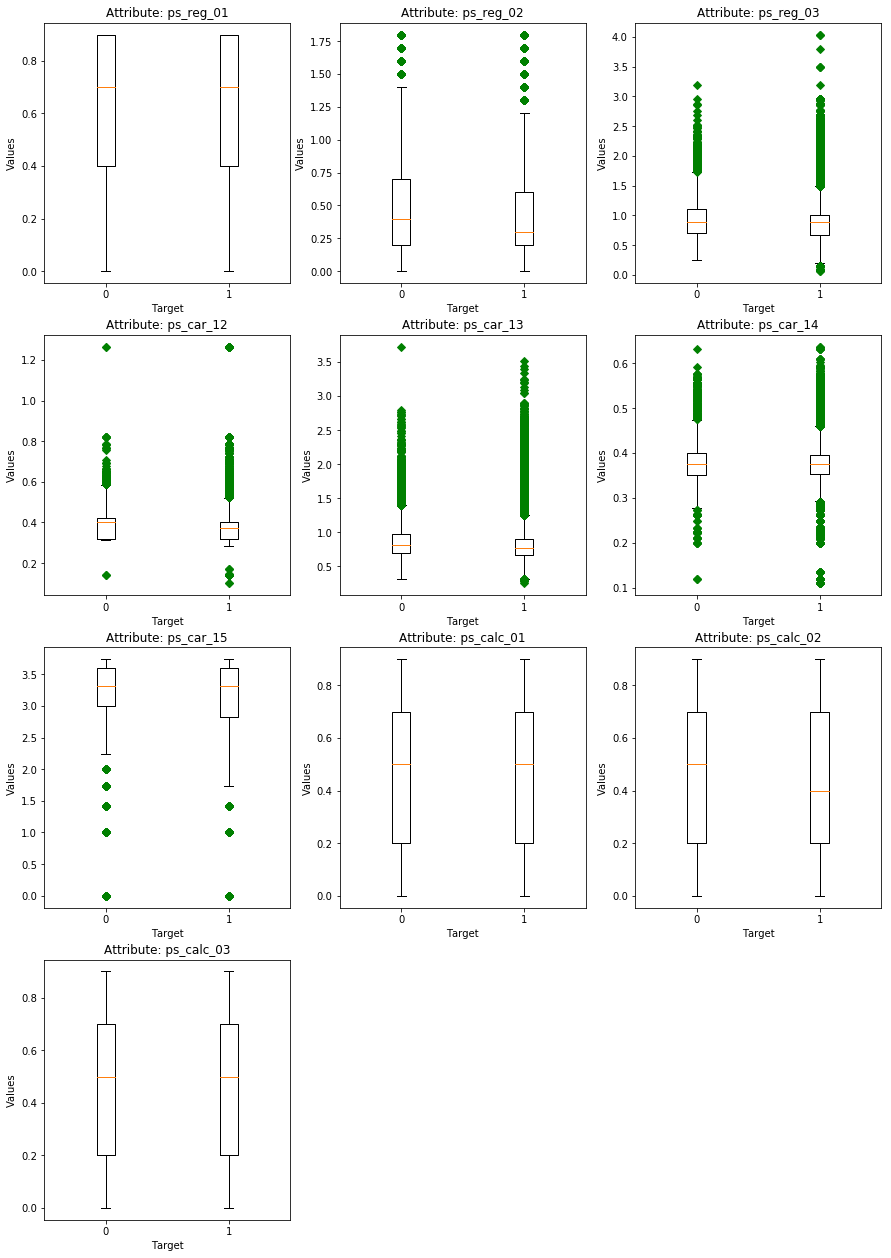

In [9]:
X_arr = np.array(X)
arr , ind, ct = np.unique(X_arr, axis=0, return_index=True,return_counts=True)
print("The orginal number of instance is",X.shape[0])
print("The duplicated number of instance is",X.shape[0]-arr.shape[0])
print("The is",X.isnull().sum().sum(),"missing values")
print()
print(Y.value_counts())
print()

data_1 = df2[df2.loc[:,"target"]==1]
data_0 = df2[df2.loc[:,"target"]==0]

import matplotlib.pyplot as plt
%matplotlib inline
i=1
fig = plt.figure(figsize = (15,45))
for name in ["ps_reg_01","ps_reg_02","ps_reg_03","ps_car_12","ps_car_13","ps_car_14","ps_car_15","ps_calc_01"
             ,"ps_calc_02","ps_calc_03"]:
    combine_col = [np.array(data_1.loc[:,name]),np.array(data_0.loc[:,name])]
    ax = fig.add_subplot(8,3,i)
    ax.boxplot(combine_col,0,'gD')
    ax.set_title("Attribute: %s"%name)
    #ax1.set_xlabel("Class Labels")
    ax.set_xticklabels([0,1])
    ax.set_ylabel("Values")
    ax.set_xlabel("Target")
    i+=1
    fig.savefig('numeric_1.png') 
plt.show()
plt.close()

In [5]:
#Set y as the target variable Table
Y = df.target
#Set X_norm as the Normalized predictor variables Table
X_norm = df.iloc[:,1:]
#Set X as the predictor variables Table
X = df.iloc[:,1:]

In [13]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, 
                                                 #Predictor Variables
                                                 Y, 
                                                 #Class labels
                                                 stratify=y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28,
                                                 # Set the randon state for spliting data  in same order
                                                )

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
#Double check the dimenision of the Data Samples
print("The dimenision of Training Sample is ",x_train.shape)
print("The dimenision of Training Target Classes is ",y_train.shape)
print("The dimenision of Testing Sample is ",x_test.shape)
print("The dimenision of Testing Target Classes is ",y_test.shape)

The dimenision of Training Sample is  (392839, 57)
The dimenision of Training Target Classes is  (392839,)
The dimenision of Testing Sample is  (202373, 57)
The dimenision of Testing Target Classes is  (202373,)


In [15]:
#Import Desision Tree, Naive Bayes , K-Nearest Neighors
from sklearn import neighbors, tree, naive_bayes

In [16]:
#Set up Decision Tree classifier with ALL default setting
treeclf = tree.DecisionTreeClassifier()
#Plug in the train dataset with target class
treeclf = treeclf.fit(x_train, y_train)
treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
#Classify the Target Class
y_pre = treeclf.predict(x_test)
print (y_pre.shape)

(202373,)


In [34]:
#Generate the Classification Report
#Generate the precision, recall, F1 score for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))
#Generate confustion matrix 
#Columns represent the Actual Values 1 through 3 from top to bottom
#Rows represent the Predicted Values 1 through 3 from left to right
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_test, y_pre, labels=[0,1])
print("---Confusion Matrix---")
print (tree_cm)
print()
tree_specficity = tree_cm[0,0] / (tree_cm[0,0]+tree_cm[0,1])
tree_sensitivity = tree_cm[1,1] / (tree_cm[1,0]+tree_cm[1,1])
print("Specificity: Decision Tree Classifier: %0.3f percent" % (tree_specficity*100))
print("Sensitivity: Decision Tree Classifier: %0.3f percent" %(tree_sensitivity*100))
print()
#The average Accuracy score across the train instances
print ("Accuracy of Training: Decision Tree Classifier: %0.3f percent" %(treeclf.score(x_train, y_train)*100))
from sklearn.metrics import accuracy_score
print("Accuracy of Training: Decision Tree Classifier: %0.3f percent" %(accuracy_score(y_test, y_pre)*100))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96    194997
          1       0.04      0.06      0.05      7376

avg / total       0.93      0.92      0.92    202373

---Confusion Matrix---
[[185400   9597]
 [  6926    450]]

Specificity: Decision Tree Classifier: 95.078 percent
Sensitivity: Decision Tree Classifier: 6.101 percent

Accuracy of Training: Decision Tree Classifier: 100.000 percent
Accuracy of Training: Decision Tree Classifier: 91.835 percent


##By GridSearch and Cross-Validation: 

In [18]:
from sklearn import tree, naive_bayes, neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [56]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28
                                                 # Set the randon state for spliting data  in same order
                                                )

#Pre-set parameters for the classifier
estimators_lst=list(map(int,np.linspace(50,100,10)))
tuned_parameters = [{"criterion" : ["entropy","gini"],
                     "n_estimators": estimators_lst,}]

scores = ['recall']

for score in scores:
    print("# Tuning R.F. parameters for %s" % score)
    print()
    from sklearn.ensemble import RandomForestClassifier
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), tuned_parameters, cv=2, scoring='%s' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning R.F. parameters for recall

Best parameters set found on development set:

{'criterion': 'entropy', 'n_estimators': 50}

Grid scores on development set:

0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 50}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 55}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 61}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 66}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 72}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 77}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 83}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 88}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 94}
0.000 (+/-0.000) for {'criterion': 'entropy', 'n_estimators': 100}
0.000 (+/-0.000) for {'criterion': 'gini', 'n_estimators': 50}
0.000 (+/-0.000) for {'criterion': 'gini', 'n_estimators': 55}
0.000 (+/-0.000) for {'criterion': 'gini', 'n_esti

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##Check on the Gridsearch Result

In [57]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify=np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28
                                                 # Set the randon state for spliting data  in same order
                                                )
clf = RandomForestClassifier(n_jobs=-1, criterion = 'entropy', n_estimators=50)
clf.fit(x_train,y_train)
print("The Score of Training dataset",clf.score(x_train, y_train))
print("The Score of Testing dataset",clf.score(x_test, y_test))
print(' ')

clf.fit(x_train,y_train)
pred_train = clf.predict(x_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, pred_train) #Generate the confusion matrix
print(cm)
print(' ')

#Class 1 means True Customers
specificity1_train = cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity1_train = cm[1,1]/(cm[1,0]+cm[1,1])
print("Decision Tree Classifier: Specificity on Training Raw Data is ", specificity1_train)
print("Decision Tree Classifier: Sensivtivity on Training Raw Data is ", sensitivity1_train)
print(' ')

#Use the SAME classifier to predict on the provided Testing Set
pred_test = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test) #Generate the confusion matrix
print(cm)
print(' ')

#Class 1 means True Customers
specificity1_test = cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity1_test = cm[1,1]/(cm[1,0]+cm[1,1])
print("Decision Tree Classifier: Specificity on Testing Raw Data is ", specificity1_test)
print("Decision Tree Classifier: Sensivtivity on Testing Raw Data is ", sensitivity1_test)

The Score of Training dataset 0.999256692945
The Score of Testing dataset 0.963552450179
 
[[378521      0]
 [   322  13996]]
 
Decision Tree Classifier: Specificity on Training Raw Data is  1.0
Decision Tree Classifier: Sensivtivity on Training Raw Data is  0.977510825534
 
[[194997      0]
 [  7376      0]]
 
Decision Tree Classifier: Specificity on Testing Raw Data is  1.0
Decision Tree Classifier: Sensivtivity on Testing Raw Data is  0.0


In [15]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, 
                                                 #Predictor Variables
                                                 Y, 
                                                 #Class labels
                                                 stratify=Y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28,
                                                 # Set the randon state for spliting data  in same order
                                                )

#Pre-set parameters for the classifier
max_depth_lst=list(np.arange(5,70,10))
tuned_parameters = [{"criterion" : ["entropy"],
                     "max_depth": max_depth_lst}, 
                    {"criterion" : ["gini"],
                     "max_depth": max_depth_lst}]

scores = ['recall']

for score in scores:
    print("# Tuning D.T. parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv=2, scoring='%s_macro' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning D.T. parameters for recall

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 25}

Grid scores on development set:

0.500 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5}
0.504 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 15}
0.506 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 25}
0.505 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 35}
0.506 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 45}
0.505 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 55}
0.506 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 65}
0.500 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5}
0.503 (+/-0.000) for {'criterion': 'gini', 'max_depth': 15}
0.507 (+/-0.000) for {'criterion': 'gini', 'max_depth': 25}
0.507 (+/-0.002) for {'criterion': 'gini', 'max_depth': 35}
0.505 (+/-0.001) for {'criterion': 'gini', 'max_depth': 45}
0.507 (+/-0.002) for {'criterion': 'gini', 'max_depth': 55}
0.506 (+/-0.003) for {'criterion': 'gini', '

In [18]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, 
                                                 #Predictor Variables
                                                 Y, 
                                                 #Class labels
                                                 stratify=Y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28,
                                                 # Set the randon state for spliting data  in same order
                                                )
clf = tree.DecisionTreeClassifier(criterion = "gini", 
                                  random_state=28,
                                  max_depth=25 )
                                  #min_samples_split= 4, 
                                  #min_samples_leaf= 1)
clf.fit(x_train,y_train)
print("The Score of Training dataset",clf.score(x_train, y_train))
print("The Score of Testing dataset",clf.score(x_test, y_test))
print(' ')

clf.fit(x_train,y_train)
pred_train = clf.predict(x_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, pred_train) #Generate the confusion matrix
print(cm)
print(' ')

#Class 1 means True Customers
specificity1_train = cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity1_train = cm[1,1]/(cm[1,0]+cm[1,1])
print("Decision Tree Classifier: Specificity on Training Raw Data is ", specificity1_train)
print("Decision Tree Classifier: Sensivtivity on Training Raw Data is ", sensitivity1_train)
print(' ')

#Use the SAME classifier to predict on the provided Testing Set
pred_test = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test) #Generate the confusion matrix
print(cm)
print(' ')

#Class 1 means True Customers
specificity1_test = cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity1_test = cm[1,1]/(cm[1,0]+cm[1,1])
print("Decision Tree Classifier: Specificity on Testing Raw Data is ", specificity1_test)
print("Decision Tree Classifier: Sensivtivity on Testing Raw Data is ", sensitivity1_test)

The Score of Training dataset 0.988175817574
The Score of Testing dataset 0.933355734214
 
[[378406    115]
 [  4530   9788]]
 
Decision Tree Classifier: Specificity on Training Raw Data is  0.999696185945
Decision Tree Classifier: Sensivtivity on Training Raw Data is  0.683615030032
 
[[188570   6427]
 [  7060    316]]
 
Decision Tree Classifier: Specificity on Testing Raw Data is  0.967040518572
Decision Tree Classifier: Sensivtivity on Testing Raw Data is  0.04284164859


In [40]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, 
                                                 #Predictor Variables
                                                 Y, 
                                                 #Class labels
                                                 stratify=Y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28,
                                                 # Set the randon state for spliting data  in same order
                                                )

#Pre-set parameters for the classifier
from sklearn.naive_bayes import BernoulliNB
binarize_lst = list(np.arange(0.0000001,1,0.01))
alpha_lst = list(np.linspace(0.1,1,100))
tuned_parameters = [{"binarize": binarize_lst},
                    {"alpha": alpha_lst}]

scores = ['recall']

for score in scores:
    print("# Tuning N.B. parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(BernoulliNB(), tuned_parameters, cv=5, scoring='%s_macro' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning N.B. parameters for recall

Best parameters set found on development set:

{'binarize': 0.89000009999999996}

Grid scores on development set:

0.501 (+/-0.000) for {'binarize': 9.9999999999999995e-08}
0.501 (+/-0.000) for {'binarize': 0.0100001}
0.501 (+/-0.000) for {'binarize': 0.0200001}
0.501 (+/-0.000) for {'binarize': 0.030000099999999998}
0.501 (+/-0.000) for {'binarize': 0.040000100000000004}
0.501 (+/-0.000) for {'binarize': 0.050000100000000006}
0.501 (+/-0.000) for {'binarize': 0.060000100000000001}
0.501 (+/-0.000) for {'binarize': 0.07000010000000001}
0.501 (+/-0.000) for {'binarize': 0.080000100000000005}
0.501 (+/-0.000) for {'binarize': 0.0900001}
0.501 (+/-0.000) for {'binarize': 0.10000010000000001}
0.501 (+/-0.000) for {'binarize': 0.1100001}
0.501 (+/-0.000) for {'binarize': 0.1200001}
0.501 (+/-0.000) for {'binarize': 0.13000010000000001}
0.501 (+/-0.000) for {'binarize': 0.14000010000000002}
0.501 (+/-0.000) for {'binarize': 0.1500001}
0.501 (+/-0.000) for

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    194997
          1       0.13      0.01      0.01      7376

avg / total       0.93      0.96      0.95    202373




In [59]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify=Y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28,
                                                 # Set the randon state for spliting data  in same order
                                                )
clf = BernoulliNB(binarize=0.89000009999999996)

clf.fit(x_train,y_train)
print("The Score of Training dataset",clf.score(x_train, y_train))
print("The Score of Testing dataset",clf.score(x_test, y_test))
print(' ')

clf.fit(x_train,y_train)
pred_train = clf.predict(x_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, pred_train) #Generate the confusion matrix
print(cm)
print(' ')

#Class 1 means True Customers
specificity1_train = cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity1_train = cm[1,1]/(cm[1,0]+cm[1,1])
print("Bernoulli Naive Bayes Classifier: Specificity on Training Raw Data is ", specificity1_train)
print("Bernoulli Naive Bayes Classifier: Sensivtivity on Training Raw Data is ", sensitivity1_train)
print(' ')

#Use the SAME classifier to predict on the provided Testing Set
pred_test = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test) #Generate the confusion matrix
print(cm)
print(' ')

#Class 1 means True Customers
specificity1_test = cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity1_test = cm[1,1]/(cm[1,0]+cm[1,1])
print("Bernoulli Naive Bayes Classifier: Specificity on Testing Raw Data is ", specificity1_test)
print("Bernoulli Naive Bayes Classifier: Sensivtivity on Testing Raw Data is ", sensitivity1_test)

The Score of Training dataset 0.961905513455
The Score of Testing dataset 0.961911915127
 
[[377760    761]
 [ 14204    114]]
 
Bernoulli Naive Bayes Classifier: Specificity on Training Raw Data is  0.997989543513
Bernoulli Naive Bayes Classifier: Sensivtivity on Training Raw Data is  0.00796200586674
 
[[194607    390]
 [  7318     58]]
 
Bernoulli Naive Bayes Classifier: Specificity on Testing Raw Data is  0.99799996923
Bernoulli Naive Bayes Classifier: Sensivtivity on Testing Raw Data is  0.00786334056399


In [ ]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify=Y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28,
                                                 # Set the randon state for spliting data  in same order
                                                )

#Pre-set parameters for the classifier
from sklearn.neighbors import KNeighborsClassifier
#binarize_lst = list(np.arange(0.0000001,1,0.01))
#alpha_lst = list(np.linspace(0.1,1,100))
n_neighbors_lst = list(np.linspace(5,10,5, dtype=np.int64))
tuned_parameters = [{"n_neighbors":n_neighbors_lst}, 
                    {"weights":['distance']},
                    {"metric":['minkowski']}]

scores = ['recall']

for score in scores:
    print("# Tuning KNN parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(neighbors.KNeighborsClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning KNN parameters for recall



##Check the PCA distribution

In [11]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

[ 0.90951193  0.02546386  0.01104802  0.00704067  0.00629573  0.00609606
  0.00530995  0.00454164  0.00361306  0.00292483]
[[-40.23522617   3.19669802   0.88656851  -6.53140223   2.02838233
   -3.64226821  -1.44229512  -3.4445299    1.15663363  -0.62531328]
 [ 33.76951063   4.24840968  -5.03994568   4.53360286  -1.32507927
   -2.30169749   1.64738455   1.51723045  -2.2592173    1.85282651]
 [-40.27989154   6.49883373   4.53002852   2.43584695  -1.34797038
   -1.54734564   1.15759172  -2.49000293  -1.90281242  -0.73220963]]


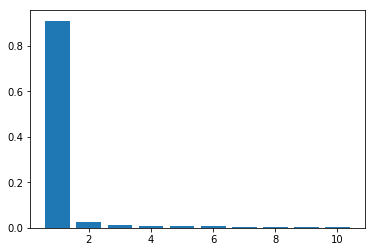

In [421]:
from sklearn.decomposition import PCA, NMF
n_component=10
pca = PCA(n_components=n_component, 
          random_state = 28, 
          iterated_power=10)
pca.fit_transform(np.array(X2))
print(pca.explained_variance_ratio_)
var_ratio_lst = pca.explained_variance_ratio_
n_compo_lst = list(map(int,np.linspace(1,n_component,n_component)))

plt.bar(n_compo_lst,var_ratio_lst)

print(X4[0:3])

##Compare the PCA and feature selection by chi-square

{'classify__C': 0.001, 'reduce_dim': PCA(copy=True, iterated_power=7, n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 1}


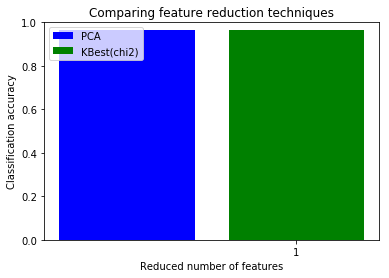

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([('reduce_dim', PCA()),
                 ('classify', LinearSVC())])

#N_FEATURES_OPTIONS = [2, 4, 8]
N_FEATURES_OPTIONS = [1]
#C_OPTIONS = [1, 10, 100, 1000]
C_OPTIONS = [0.001]
#kernel_Option = ["linear","rbf","poly"]

param_grid = [{'reduce_dim': [PCA(iterated_power=7)],
               'reduce_dim__n_components': N_FEATURES_OPTIONS,
               'classify__C': C_OPTIONS},
              {'reduce_dim': [SelectKBest(chi2)],
               'reduce_dim__k': N_FEATURES_OPTIONS,
               'classify__C': C_OPTIONS}]

#reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
reducer_labels = ['PCA',  'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid) #Use Recall as scoring method
digits = load_digits()
grid.fit(np.array(X2), np.array(Y2))

print(grid.best_params_)
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *(len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

####calc_params function is used to predict class for train and test set
####calc_accuracy function is used to calculate the Accuracy score for train and test set

In [ ]:
from sklearn.metrics import accuracy_score


#Function run the classifier
def calc_params(x_train,x_test,y_train, clf):
    model=clf
    model = model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    return pred_train, pred_test

#Function to calculate the accuracy of classifier
def calc_accuracy(pred_train, pred_test, y_train, y_test):
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    return train_score, test_score

##The following is to use Cross-validation method to evaluate different classifiers (Decision Tree, Naive Bayes, Bagging, Random Forest, AdaBoost)

In [ ]:
X=np.array(X)
Y=np.array(Y)
n_est_lst=[]
cv_mean_train_score_lst = []
cv_mean_test_score_lst = []
cv_mean_specificity_lst = []
cv_mean_sensitivity_lst = []
cv_mean_precision_lst = []
time_lst=[]

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors, tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import time

from sklearn.ensemble import BaggingClassifier
from sklearn.cross_validation import KFold
K=3 #Set the number of Fold Cross Validataion
cv = KFold(len(X),K,shuffle=True, random_state=28)
#alpha_lst = [0.2,0.4,0.6,0.8,1.0]

n_est_lst= [2,4,6,8]
for n_est in n_est_lst:
    start=time.time()
    #n_est_lst.append(n_est)
    
    
    
    
    
    clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy'), n_estimators=n_est)
    #clf = tree.DecisionTreeClassifier(criterion="entropy")
    #clf = BernoulliNB()

    #n_neighbors=3
    #clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
    #clf = svm.SVC(C=C_value, kernel = "linear")
    #clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1,criterion ="entropy"),n_estimators=n_est)
    #clf = RandomForestClassifier(n_jobs=-1, criterion = 'entropy', n_estimators = n_est)

    train_score_lst = []
    test_score_lst = []
    specificity_lst = []
    sensitivity_lst = []
    precision_lst= []

    for i , (train,test) in enumerate(cv):
        #Plug in the "calc_params" function
        pred_train, pred_test = calc_params([X[k] for k in train],
                                            [X[k] for k in test],
                                            Y[train], 
                                            clf)
        #plug in the "calc_accuracy" function
        train_score, test_score = calc_accuracy(pred_train, pred_test, Y[train], Y[test])

        #Store Accuracy of Training and Testing into lists
        train_score_lst.append(train_score)
        test_score_lst.append(test_score)

        from sklearn.metrics import confusion_matrix
        tree_cm = confusion_matrix(Y[test], pred_test, labels=[0,1])
        print(tree_cm)
        specificity_lst.append(tree_cm[0,0] / (tree_cm[0,0]+tree_cm[0,1]))
        sensitivity_lst.append(tree_cm[1,1] / (tree_cm[1,0]+tree_cm[1,1]))
        precision_lst.append(tree_cm[1,1] / (tree_cm[0,1]+tree_cm[1,1]))


    cv_mean_train_score_lst.append(np.mean(train_score_lst))
    cv_mean_test_score_lst.append(np.mean(test_score_lst))
    cv_mean_specificity_lst.append(np.mean(specificity_lst))
    cv_mean_sensitivity_lst.append(np.mean(sensitivity_lst))
    cv_mean_precision_lst.append(np.mean(precision_lst))

    end=time.time()
    time_lst.append(start-end)
    print(end-start)
    print()
#print(tree_cm)
#print()

#print("Mean of Accuracy Score of Training Set:",np.mean(train_score_lst)*100,"%")
#print("Mean of Accuracy Score of Testing Set:",np.mean(test_score_lst)*100,"%")
#print()
#print("Mean of Specificity: %0.3f percent" % (np.mean(specificity_lst*100)))
#print("Mean of Sensitivity: %0.3f percent" %(np.mean(sensitivity_lst*100)))
    
#print(end-start)

acc_table =pd.DataFrame(list(zip(n_est_lst,
                                 cv_mean_train_score_lst ,
                                 cv_mean_test_score_lst ,
                                 cv_mean_specificity_lst,
                                 cv_mean_sensitivity_lst,
                                 cv_mean_precision_lst,time_lst)),
                        columns=("n_estimators",
                                 "cv_mean_train_score" ,
                                 "cv_mean_test_score" ,
                                 "cv_mean_specificity",
                                 "cv_mean_sensitivity", 
                                 "cv_mean_precision_lst","time_Sec"))
print(acc_table)

##Write the result the above test result to csv file
acc_table.to_csv("result.csv")

##Run the holdout test on all classifers (Testing set = 34%)

In [528]:
X=np.array(X_over)
Y=np.array(Y_over)


train_score_lst = []
test_score_lst = []
specificity_lst = []
sensitivity_lst = []
precision_lst = []
time_lst = []


from sklearn.cross_validation import train_test_split

iter_lst = list(map(int,(np.linspace(1,20,20))))
for i in iter_lst:
    start=time.time()
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     Y, #Class labels
                                                     stratify=Y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=0.34)#Size of Training data set is 34% of Overall
                                                     #random_state=i) # Set the rand
    
    #clf = tree.DecisionTreeClassifier(criterion="entropy")
    #clf = RandomForestClassifier(n_jobs=-1, criterion = 'entropy', n_estimators = 6)
    clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy'), n_estimators=6)

    pred_train, pred_test = calc_params(x_train, x_test,y_train,clf)
    #plug in the "calc_accuracy" function
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    
    tree_cm = confusion_matrix(y_test, pred_test, labels=[0,1])
    print(tree_cm)
    specificity_lst.append(tree_cm[0,0] / (tree_cm[0,0]+tree_cm[0,1]))
    sensitivity_lst.append(tree_cm[1,1] / (tree_cm[1,0]+tree_cm[1,1]))
    precision_lst.append(tree_cm[1,1] / (tree_cm[0,1]+tree_cm[1,1]))
    
    end=time.time()
    time_lst.append(end-start)
    print(i,end-start)
    print()
    
acc_table = pd.DataFrame(list(zip(iter_lst,
                                 train_score_lst ,
                                 test_score_lst ,
                                 specificity_lst,
                                 sensitivity_lst,
                                 precision_lst,time_lst)),
                        columns=("iteration",
                                 "train_score" ,
                                 "test_score" ,
                                 "specificity",
                                 "sensitivity", 
                                 "precision_lst","time_Sec"))

print(acc_table)
#Write the result to csv file
acc_table.to_csv("iteration_holdout.csv")

[[194913     84]
 [  7800 187196]]
1 167.35692024230957

[[194926     71]
 [  7638 187358]]
2 173.64462995529175

[[194907     90]
 [  7841 187155]]
3 178.39453792572021

[[194897     99]
 [  7823 187174]]
4 177.23942708969116

[[194925     71]
 [  7874 187123]]
5 173.5369598865509

[[194905     92]
 [  7691 187305]]
6 175.08920001983643

[[194902     94]
 [  7699 187298]]
7 175.32375478744507

[[194902     94]
 [  7705 187292]]
8 179.01759600639343

[[194904     93]
 [  7764 187232]]
9 174.71871781349182

[[194906     91]
 [  7888 187108]]
10 178.58417010307312

[[194901     95]
 [  7676 187321]]
11 182.37209296226501

[[194915     81]
 [  7859 187138]]
12 174.76245188713074

[[194901     95]
 [  7684 187313]]
13 172.66732597351074

[[194914     82]
 [  7827 187170]]
14 175.89979124069214

[[194895    102]
 [  7719 187277]]
15 179.1749632358551

[[194896    100]
 [  7686 187311]]
16 176.7671422958374

[[194904     92]
 [  7715 187282]]
17 171.02810525894165

[[194918     79]
 [  7736 

##Reset predictor variables and target variables to Y and X tables

In [680]:
Y= df2.loc[:,"target"]
X= df2.loc[:, "ps_ind_01":]
X.shape

(595212, 57)

##Generate Under-Sampling dataset

In [488]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_under, Y_under, idx_under = rus.fit_sample(X, Y)
pd.DataFrame(y_under).loc[:,0].value_counts()

1    21694
0    21694
Name: 0, dtype: int64

##Generate Over-Sampling dataset

In [509]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

print('Original dataset shape {}'.format(Counter(Y)))
#sm = SMOTE(ratio = {1:400000},random_state=42)
sm = SMOTE(random_state=42)
X_over, Y_over = sm.fit_sample(X, Y)
print('Resampled dataset shape {}'.format(Counter(Y_over)))

Original dataset shape Counter({0: 573518, 1: 21694})
Resampled dataset shape Counter({0: 573518, 1: 573518})


##Transform Over-Sampling dataset to PCA(components=5)

In [77]:
pca=PCA(n_components=5)
pca.fit(X_over)
X_pca = pca.transform(X_over)
#x_test = pca.transform(x_test)
X_pca.shape

(1147036, 5)

##Evaluate the top 10 PCA components in original dataset

[ 0.90909554  0.02545265  0.01104275  0.00703743  0.00629284  0.00609743
  0.00531223  0.00453955  0.00361298  0.00292575]


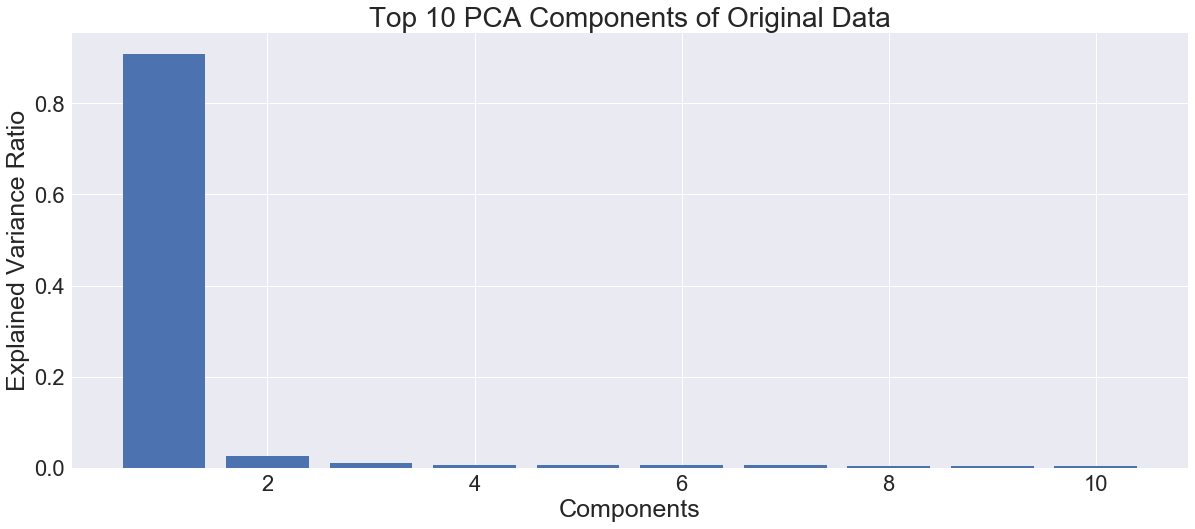

In [681]:
from sklearn.decomposition import PCA, NMF
n_component=10
pca = PCA(n_components=n_component)#, iterated_power=10)
pca.fit_transform(np.array(X))
print(pca.explained_variance_ratio_)
var_ratio_lst = pca.explained_variance_ratio_
n_compo_lst = list(map(int,np.linspace(1,n_component,n_component)))

fig=plt.figure(figsize=(20,8))
plt.bar(n_compo_lst,var_ratio_lst)
plt.title("Top 10 PCA Components of Original Data",size=28)
plt.xlabel("Components", size=25)
plt.ylabel("Explained Variance Ratio",size=25)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
fig.savefig("PCA_Distribution.png")
plt.show()


##Visualize Original Samples with PCA (n=2)

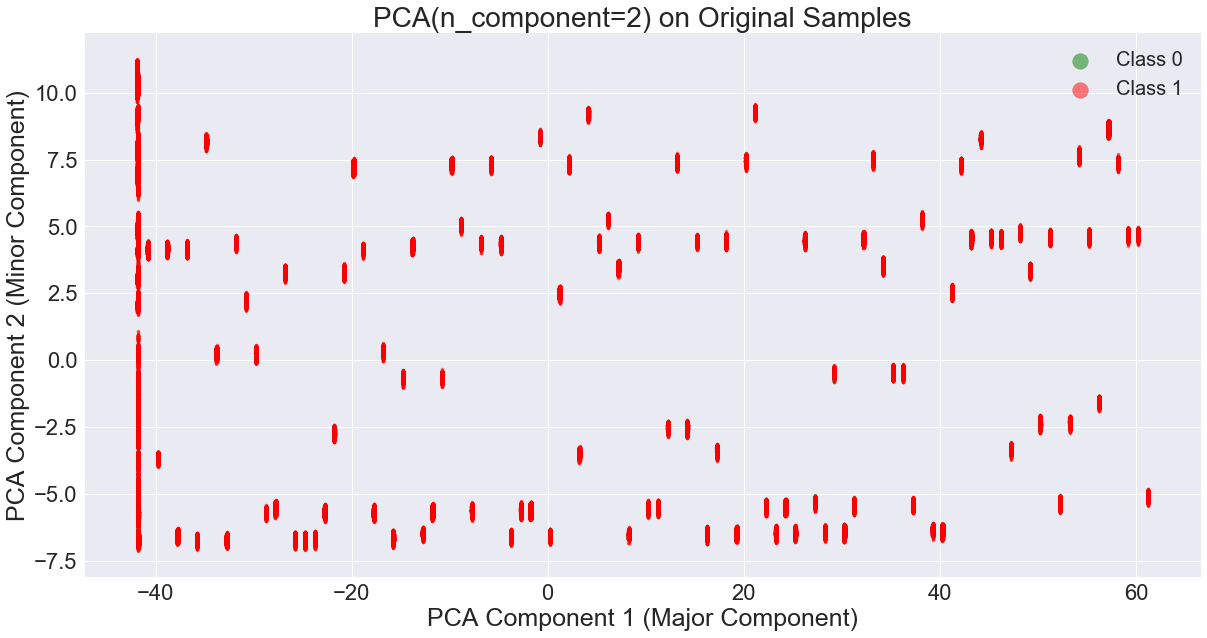

In [676]:
pca=PCA(n_components=2)
pca.fit(X)
X_pca_org = pca.transform(X)


labels=['Class 1', "Class 0"]
colors=["red","green"]
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
for color, i in zip(colors, [1,0 ]):
    ax.scatter(x=X_pca_org[Y == i, 0], y=X_pca_org[Y == i, 1], 
               alpha=.5,s=10, color=colors[i], label=labels[i])
plt.legend(loc='upper right', fontsize=20, scatterpoints=1, markerscale=5,ncol=1)    
plt.title("PCA(n_component=2) on Original Samples",size=28)
plt.xlabel("PCA Component 1 (Major Component)", size=25)
plt.ylabel("PCA Component 2 (Minor Component)", size=25)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
fig.savefig('PCA_Original_plot1.png')
plt.show()    


##Visualize Over-Sampling dataset by PCA(n=2)

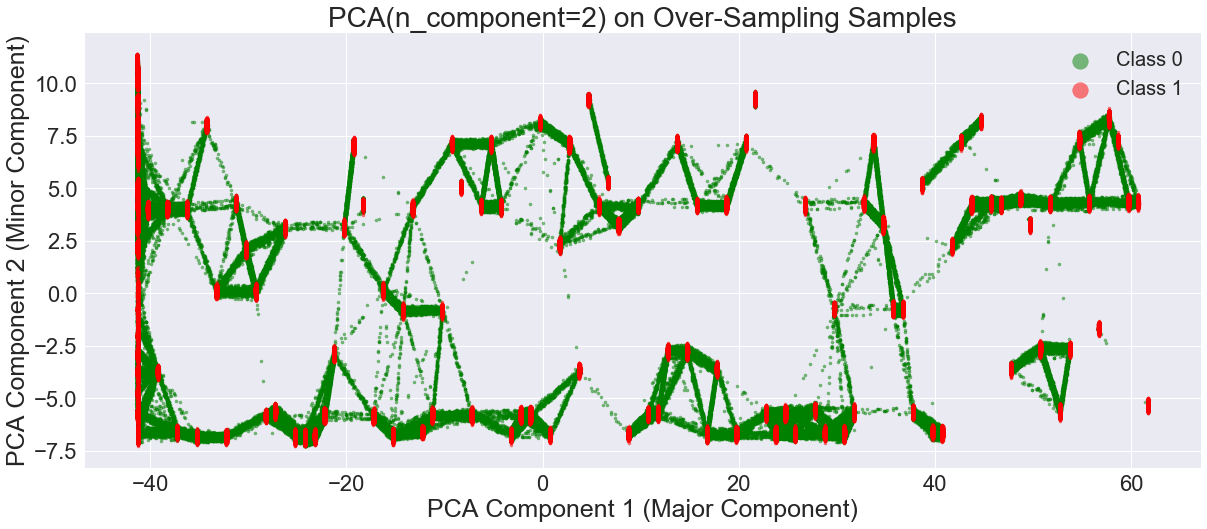

In [678]:
pca=PCA(n_components=2)
pca.fit(X_over)
X_pca_over = pca.transform(X_over)

labels=['Class 1', "Class 0"]
colors=["red","green"]
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
for color, i in zip(colors, [1,0 ]):
    ax.scatter(x=X_pca_over[Y_over == i, 0], y=X_pca_over[Y_over == i, 1], 
               alpha=.5,s=10, color=colors[i], label=labels[i])
plt.legend(loc='upper right', fontsize=20, scatterpoints=1, markerscale=5,ncol=1)    
plt.title("PCA(n_component=2) on Over-Sampling Samples",size=28)
plt.xlabel("PCA Component 1 (Major Component)", size=25)
plt.ylabel("PCA Component 2 (Minor Component)", size=25)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
fig.savefig('PCA_OverSampling_plot1.png')
plt.show()    

##Visualize Under-Sampling dataset by PCA(n=2)

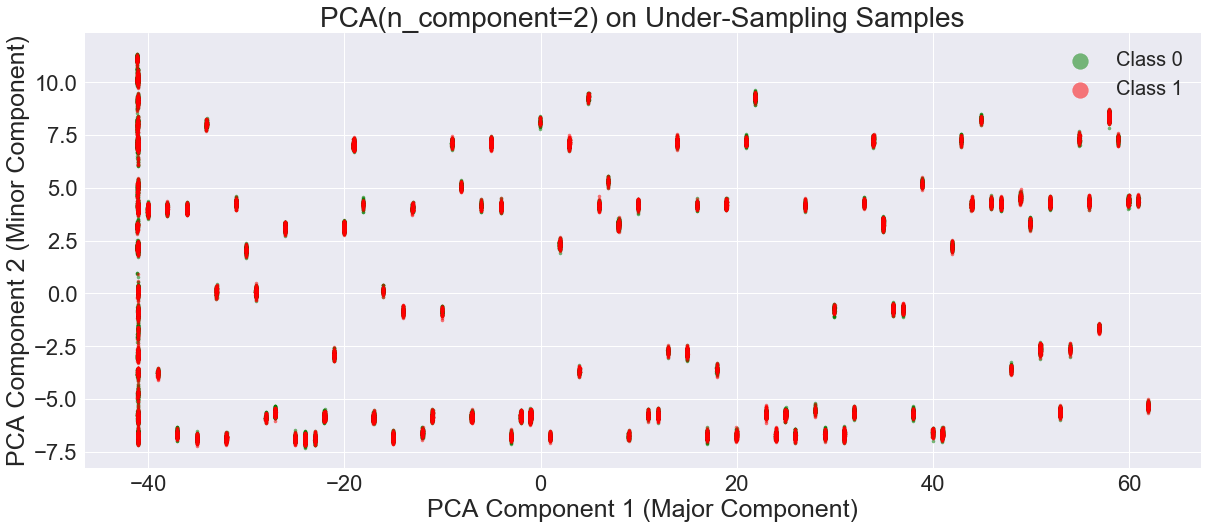

In [679]:
pca=PCA(n_components=2)
pca.fit(X_under)
X_pca_under = pca.transform(X_under)


labels=['Class 1', "Class 0"]
colors=["red","green"]
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
for color, i in zip(colors, [1,0 ]):
    ax.scatter(x=X_pca_under[Y_under == i, 0], y=X_pca_under[Y_under == i, 1], 
               alpha=.5,s=10, color=colors[i], label=labels[i])
plt.legend(loc='upper right', fontsize=20, scatterpoints=1, markerscale=5,ncol=1)    
plt.title("PCA(n_component=2) on Under-Sampling Samples",size=28)
plt.xlabel("PCA Component 1 (Major Component)", size=25)
plt.ylabel("PCA Component 2 (Minor Component)", size=25)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
fig.savefig('PCA_Under-Sampling_plot1.png')
plt.show()   



In [242]:
roc_bag_df = pd.read_csv("roc_bagging.csv")
roc_bag_pca_over = roc_bag_df[roc_bag_df.Samples=="PCA(5)-OVER"]
roc_bag_pca_over.columns

Index(['Classifier', 'Samples', 'Number of Trees', 'Train Score', 'Test Score',
       'Specificity', 'Sensitivity', 'Precision', 'Cross-Validation'],
      dtype='object')

##Create Table for Over-Sampling Classification result

In [395]:
roc_bag_df = pd.read_csv("roc_bagging.csv")
roc_bag_over = roc_bag_df[roc_bag_df.Samples=="Over-Sample"]
roc_bag_over

,Classifier,Samples,Number of Trees,Train Score,Test Score,Specificity,Sensitivity,Precision,Cross-Validation
2,bagging(decisioinTree),Over-Sample,10,1.000,0.981,1.0,0.961,1.0,3
3,bagging(decisioinTree),Over-Sample,20,0.998,0.981,1.0,0.961,1.0,3
4,bagging(decisioinTree),Over-Sample,40,0.999,0.981,1.0,0.962,1.0,3
5,bagging(decisioinTree),Over-Sample,60,1.000,0.981,1.0,0.962,1.0,3
6,bagging(decisioinTree),Over-Sample,80,1.000,0.981,1.0,0.962,1.0,3
7,bagging(decisioinTree),Over-Sample,100,1.000,0.981,1.0,0.962,1.0,3


##Generate Over-Sampleing Accuracy Plot

   Number_of_trees  Train_Score  Test_Score  Sensitivity  Specificity
0               10        1.000       0.981        0.961          1.0
1               20        0.998       0.981        0.961          1.0
2               40        0.999       0.981        0.962          1.0
3               60        1.000       0.981        0.962          1.0
4               80        1.000       0.981        0.962          1.0
5              100        1.000       0.981        0.962          1.0


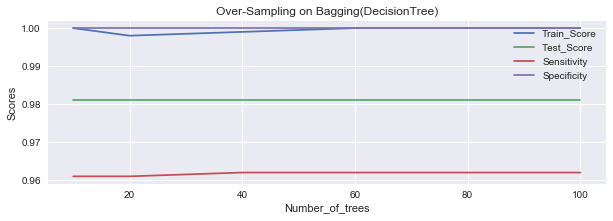

In [432]:
df = pd.DataFrame(list(zip(roc_bag_over['Number of Trees'],
                           roc_bag_over["Train Score"],
                           roc_bag_over["Test Score"],
                           roc_bag_over["Sensitivity"],
                           roc_bag_over["Specificity"])), 
     columns=("Number_of_trees","Train_Score", "Test_Score","Sensitivity", "Specificity"))
print(df)


df.plot(x='Number_of_trees', figsize=(10,3), )
plt.title("Over-Sampling on Bagging(DecisionTree)")
plt.legend(loc='upper right', fontsize=10)    
plt.ylabel("Scores")
fig.savefig('PCA_Under-Sampling_plot1.png')
plt.show()

##Generate Sensitivity Comparision Plot (Original vs Over-Sampling)

In [609]:
Bag_result_df = pd.read_csv("Ensemble_Bag_Result.csv")
RF_result_df = pd.read_csv("Ensemble_RF_Result.csv")
Ada_result_df = pd.read_csv("Ensemble_ada_Result.csv")

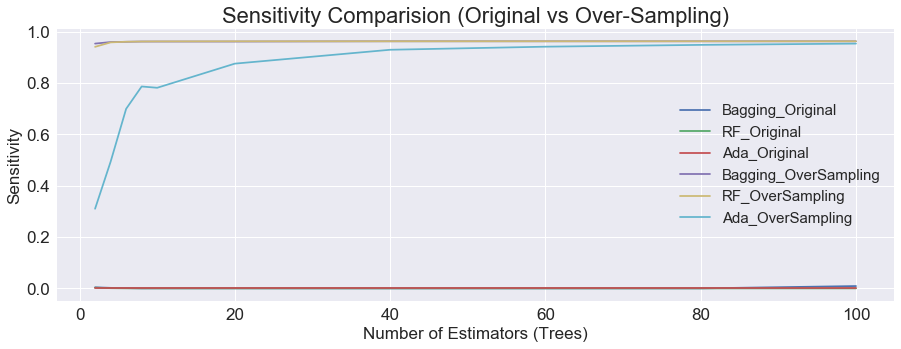

In [626]:
#Ada_result_df[Ada_result_df.Samples=="Over-Sampling"]
#RF_result_df[RF_result_df.Samples=="Over-Sampling"]
#Bag_result_df[Bag_result_df.Samples=="Over-Sampling"]

#Ada_result_df[Ada_result_df.Samples=="Original"]
#RF_result_df[RF_result_df.Samples=="Original"]
#Bag_result_df[Bag_result_df.Samples=="Original"]

sen_result_df = pd.DataFrame(list((zip(Bag_result_df[Bag_result_df.Samples=="Original"]["n_estimator"],
                                       Bag_result_df[Bag_result_df.Samples=="Original"]["sensitivity"],
                                       RF_result_df[RF_result_df.Samples=="Original"]["sensitivity"],
                                       Ada_result_df[Ada_result_df.Samples=="Original"]["sensitivity"],
                                       Bag_result_df[Bag_result_df.Samples=="Over-Sampling"]["sensitivity"],
                                       RF_result_df[RF_result_df.Samples=="Over-Sampling"]["sensitivity"],
                             Ada_result_df[Ada_result_df.Samples=="Over-Sampling"]["sensitivity"]))),
                                       
                                       
             columns=["Estimators","Bagging_Original","RF_Original","Ada_Original",
                      "Bagging_OverSampling","RF_OverSampling","Ada_OverSampling"])

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
sen_result_df.plot(x="Estimators",ax=ax)
plt.legend(fontsize=15)
plt.title("Sensitivity Comparision (Original vs Over-Sampling)",size=22)
plt.xlabel("Number of Estimators (Trees)", size=17)
plt.ylabel("Sensitivity", size=17)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
fig.savefig('Sensitivity_Comparision_plot1.png')
plt.show()

#Generate Accuracy Comparision Plot (Original vs Over-Sampling)

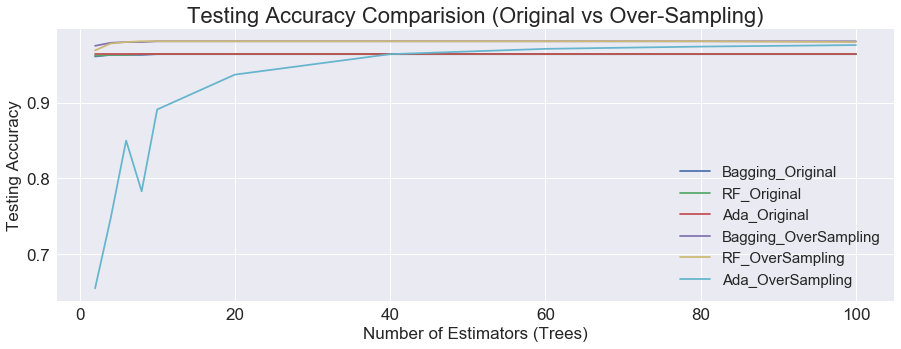

In [627]:
acc_result_df = pd.DataFrame(list((zip(Bag_result_df[Bag_result_df.Samples=="Original"]["n_estimator"],
                                       Bag_result_df[Bag_result_df.Samples=="Original"]["test_score"],
                                       RF_result_df[RF_result_df.Samples=="Original"]["test_score"],
                                       Ada_result_df[Ada_result_df.Samples=="Original"]["test_score"],
                                       Bag_result_df[Bag_result_df.Samples=="Over-Sampling"]["test_score"],
                                       RF_result_df[RF_result_df.Samples=="Over-Sampling"]["test_score"],
                             Ada_result_df[Ada_result_df.Samples=="Over-Sampling"]["test_score"]))),
                                       
                                       
             columns=["Estimators","Bagging_Original","RF_Original","Ada_Original",
                      "Bagging_OverSampling","RF_OverSampling","Ada_OverSampling"])

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
acc_result_df.plot(x="Estimators", figsize=(15,5),ax=ax)
plt.legend(fontsize=15)
plt.title("Testing Accuracy Comparision (Original vs Over-Sampling)",size=22)
plt.xlabel("Number of Estimators (Trees)", size=17)
plt.ylabel("Testing Accuracy", size=17)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
fig.savefig('Accuracy_Comparision_plot1.png')
plt.show()

##Generate Specificity Comparision Plot (Original vs Over-Sampling)

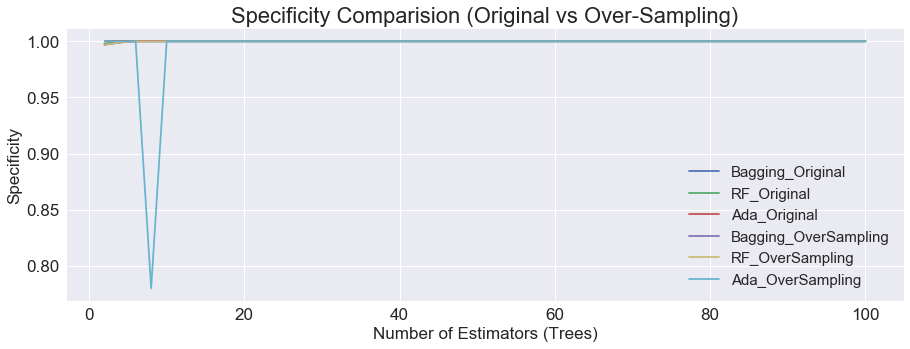

In [628]:
spec_result_df = pd.DataFrame(list((zip(Bag_result_df[Bag_result_df.Samples=="Original"]["n_estimator"],
                                       Bag_result_df[Bag_result_df.Samples=="Original"]["specificity"],
                                       RF_result_df[RF_result_df.Samples=="Original"]["specificity"],
                                       Ada_result_df[Ada_result_df.Samples=="Original"]["specificity"],
                                       Bag_result_df[Bag_result_df.Samples=="Over-Sampling"]["specificity"],
                                       RF_result_df[RF_result_df.Samples=="Over-Sampling"]["specificity"],
                             Ada_result_df[Ada_result_df.Samples=="Over-Sampling"]["specificity"]))),
                                       
                                       
             columns=["Estimators","Bagging_Original","RF_Original","Ada_Original",
                      "Bagging_OverSampling","RF_OverSampling","Ada_OverSampling"])

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
spec_result_df.plot(x="Estimators", figsize=(15,5),ax=ax)
plt.legend(fontsize=15)
plt.title("Specificity Comparision (Original vs Over-Sampling)",size=22)
plt.xlabel("Number of Estimators (Trees)", size=17)
plt.ylabel("Specificity", size=17)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
fig.savefig('Specificity_Comparision_plot1.png')
plt.show()

##Generate Precision Comparision Plot (Original vs Over-Sampling)

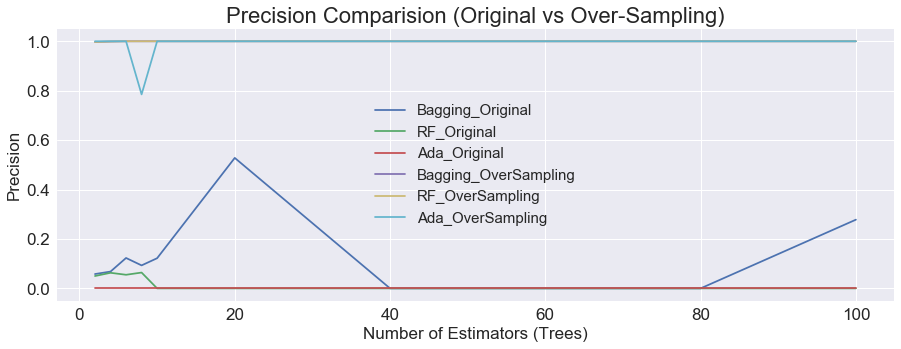

In [629]:
prec_result_df = pd.DataFrame(list((zip(Bag_result_df[Bag_result_df.Samples=="Original"]["n_estimator"],
                                       Bag_result_df[Bag_result_df.Samples=="Original"]["precision"],
                                       RF_result_df[RF_result_df.Samples=="Original"]["precision"],
                                       Ada_result_df[Ada_result_df.Samples=="Original"]["precision"],
                                       Bag_result_df[Bag_result_df.Samples=="Over-Sampling"]["precision"],
                                       RF_result_df[RF_result_df.Samples=="Over-Sampling"]["precision"],
                             Ada_result_df[Ada_result_df.Samples=="Over-Sampling"]["precision"]))),
                                       
                                       
             columns=["Estimators","Bagging_Original","RF_Original","Ada_Original",
                      "Bagging_OverSampling","RF_OverSampling","Ada_OverSampling"])

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
prec_result_df.plot(x="Estimators", figsize=(15,5),ax=ax)
plt.legend(fontsize=15)
plt.title("Precision Comparision (Original vs Over-Sampling)",size=22)
plt.xlabel("Number of Estimators (Trees)", size=17)
plt.ylabel("Precision", size=17)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
fig.savefig('Precision_Comparision_plot1.png')
plt.show()

In [ ]:
holdout_bag_df = pd.read_csv("Holdout_Bag.csv")
holdout_DT_df = pd.read_csv("Holdout_DT.csv")
holdout_RF_df = pd.read_csv("Holdout_RF.csv")
holdout_RF_df

##Calculate Accuracy and Sensitivity of the Holdout Testing

In [661]:
print("Mean of Accuracy (Bagging): on Validation Set is",np.mean(holdout_bag_df.test_score))
print("Mean of Accuracy (Decision Tree): on Validation Set is",np.mean(holdout_DT_df.test_score))
print("Mean of Accuracy (Random Forest): on Validation Set is",np.mean(holdout_RF_df.test_score))
print()
print("Mean of Sensitivity (Bagging): on Validation Set is",np.mean(holdout_bag_df.sensitivity))
print("Mean of Sensitivity (Decision Tree): on Validation Set is",np.mean(holdout_DT_df.sensitivity))
print("Mean of Sensitivity (Random Forest): on Validation Set is",np.mean(holdout_RF_df.sensitivity))

Mean of Accuracy (Bagging): on Validation Set is 0.9798807927321773
Mean of Accuracy (Decision Tree): on Validation Set is 0.9580620677807039
Mean of Accuracy (Random Forest): on Validation Set is 0.9800050257312314

Mean of Sensitivity (Bagging): on Validation Set is 0.9602254603019226
Mean of Sensitivity (Decision Tree): on Validation Set is 0.9622847075339479
Mean of Sensitivity (Random Forest): on Validation Set is 0.9602456972085138


##Paired t-test for all the classifiers

In [662]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(holdout_bag_df.test_score,holdout_DT_df.test_score,equal_var = False)
print("Validation Set Accuracy (Bagging vs Decision Tree): t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))
t_stat, p_value = stats.ttest_ind(holdout_bag_df.test_score,holdout_RF_df.test_score,equal_var = False)
print("Validation Set Accuracy (Bagging vs Random Forest): t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))
t_stat, p_value = stats.ttest_ind(holdout_DT_df.test_score,holdout_RF_df.test_score,equal_var = False)
print("Validation Set Accuracy (Decison Tree vs Random Forest): t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))
print()
t_stat, p_value = stats.ttest_ind(holdout_bag_df.sensitivity,holdout_DT_df.sensitivity,equal_var = False)
print("Sensitivity (Bagging vs Decision Tree): t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))
t_stat, p_value = stats.ttest_ind(holdout_bag_df.sensitivity,holdout_RF_df.sensitivity,equal_var = False)
print("Sensitivity (Bagging vs Random Forest): t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))
t_stat, p_value = stats.ttest_ind(holdout_DT_df.sensitivity,holdout_RF_df.sensitivity,equal_var = False)
print("Sensitivity (Decison Tree vs Random Forest): t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))
print()

Validation Set Accuracy (Bagging vs Decision Tree): t_statistic is 229.659 and p-value is 0.000
Validation Set Accuracy (Bagging vs Random Forest): t_statistic is -1.792 and p-value is 0.082
Validation Set Accuracy (Decison Tree vs Random Forest): t_statistic is -215.436 and p-value is 0.000

Sensitivity (Bagging vs Decision Tree): t_statistic is -17.435 and p-value is 0.000
Sensitivity (Bagging vs Random Forest): t_statistic is -0.148 and p-value is 0.883
Sensitivity (Decison Tree vs Random Forest): t_statistic is 15.155 and p-value is 0.000



##Calculate the Confidence interval of sensitivity and Accuracy for all classifier

In [664]:
p=np.mean(holdout_DT_df.test_score)
q=1-p
n=len(holdout_DT_df.test_score)
#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("Decision Tree: 95 Percent Confidence Interval of Accuracy on Validation set is (%0.3f,%0.3f)"%(ci_left,ci_right))

p=np.mean(holdout_bag_df.test_score)
q=1-p
n=len(holdout_bag_df.test_score)
#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("Bagging: 95 Percent Confidence Interval of Accuracy on Validation set is (%0.3f,%0.3f)"%(ci_left,ci_right))

p=np.mean(holdout_RF_df.test_score)
q=1-p
n=len(holdout_RF_df.test_score)
#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("Random Forest: 95 Percent Confidence Interval of Accuracy on Validation set is (%0.3f,%0.3f)"%(ci_left,ci_right))

print()

p=np.mean(holdout_DT_df.sensitivity)
q=1-p
n=len(holdout_DT_df.sensitivity)
#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("Decision Tree: 95 Percent Confidence Interval of Sensitivity on Validation set is (%0.3f,%0.3f)"%(ci_left,ci_right))

p=np.mean(holdout_bag_df.sensitivity)
q=1-p
n=len(holdout_bag_df.sensitivity)
#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("Bagging: 95 Percent Confidence Interval of Sensitivity on Validation set is (%0.3f,%0.3f)"%(ci_left,ci_right))

p=np.mean(holdout_RF_df.sensitivity)
q=1-p
n=len(holdout_RF_df.sensitivity)
#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("Random Forest: 95 Percent Confidence Interval of Sensitivity on Validation set is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree: 95 Percent Confidence Interval of Accuracy on Validation set is (0.870,1.046)
Bagging: 95 Percent Confidence Interval of Accuracy on Validation set is (0.918,1.041)
Random Forest: 95 Percent Confidence Interval of Accuracy on Validation set is (0.919,1.041)

Decision Tree: 95 Percent Confidence Interval of Sensitivity on Validation set is (0.879,1.046)
Bagging: 95 Percent Confidence Interval of Sensitivity on Validation set is (0.875,1.046)
Random Forest: 95 Percent Confidence Interval of Sensitivity on Validation set is (0.875,1.046)


##Find out the ranking of feature importance for the best model (Decision Tree) 

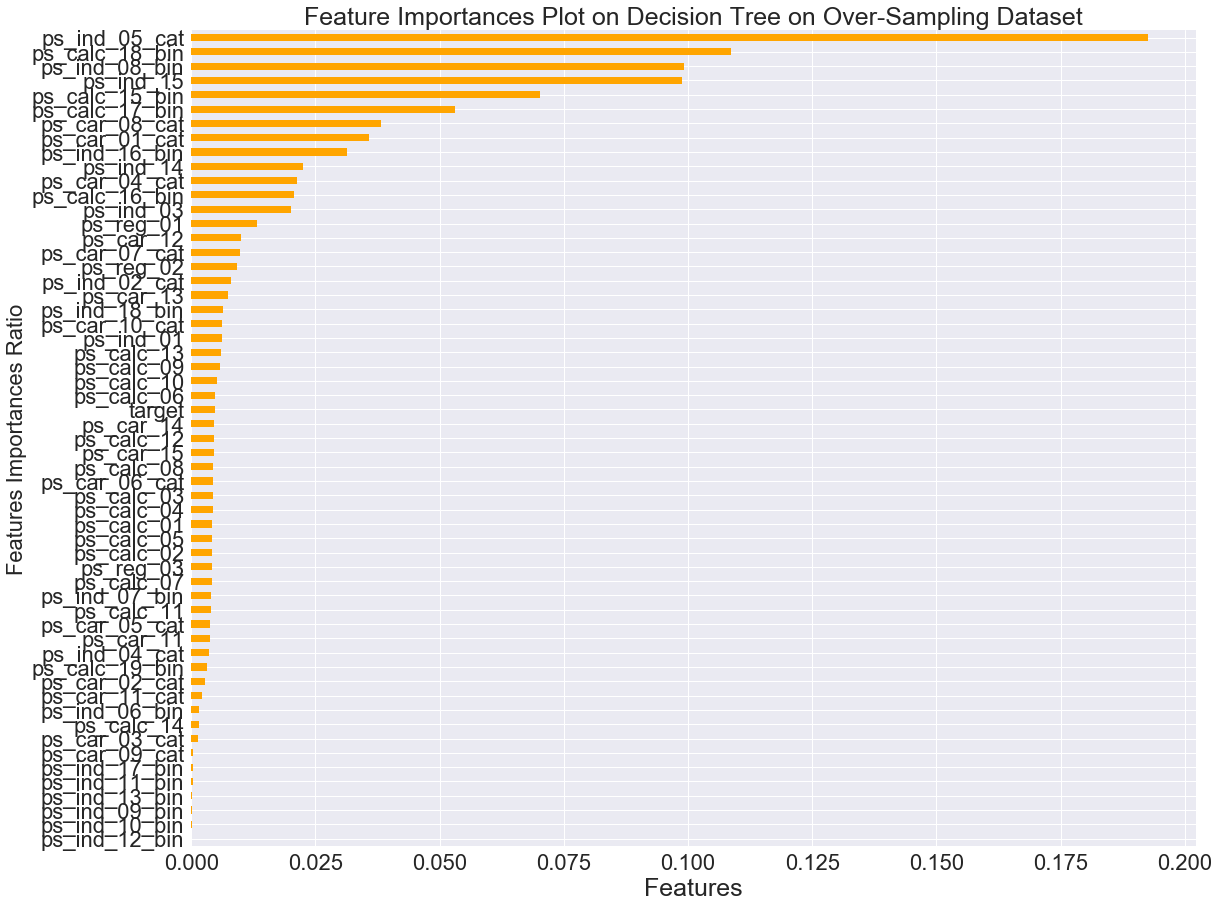

In [705]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_over, Y_over)
importances = clf.feature_importances_


fig=plt.figure(figsize=(18,15))
ax=fig.add_subplot(111)
df_importances.plot(x=df_importances.loc[:,0],kind='barh',legend=False, ax=ax, color="orange")
plt.title("Feature Importances Plot on Decision Tree on Over-Sampling Dataset", size=25 )
plt.xlabel("Features", size=25)
plt.ylabel("Features Importances Ratio", size=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
fig.savefig('feature_importances_plot1.png')
plt.show()

##Visualize the decision tree

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_over, Y_over)

import graphviz 
tree_image=tree.export_graphviz(clf,out_file=None,feature_names=df2.columns[1:]) 
graph = graphviz.Source(tree_image) 
graph